# Optimization Methods in Machine Learning

## Homework Assignment 2

For code-writing part of homework, please submit the single Jupyter Notebook file, where only Python and Markdown/LaTeX are used. The submission should be in the following format: YourName_HW2.ipynb.

You are free to modify the function templates and use additional libraries. However, do not use built-in functions if the assignment requires you to implement the method from scratch. Do not forget to add necessary explanations and comments.


The works will be checked for plagiarism. The score will be divided by the number of similar works.

### Problem 1

### 1.1 (3 pts)
Consider a quadratic convex function
$$f(x) = \frac{1}{2}x^TAx + b^Tx$$

where $A\in\mathbb{R}^{n \times n}$ is a positive semidefinite matrix, $x\in\mathbb{R}^{n}$,  $b\in\mathbb{R}^{n}$.

Your task is to find the minimum $x^*$ by implementing gradient descent algorithm. (1 pts)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [39]:
from tqdm import tqdm

def cost(A, x, b):
    """
    Returns:
    f: the scalar value of the function at point x
    """
    f = 0.5*(x.T @ A @ x) + b.T @ x
    # Ensuring f is scalar
    f = np.sum(f)
    return f


def grad(A, x, b):
    """
    Returns:
        nabla_f: The gradient of the quadratic function at point x
    """
    # From lecture note 1/2(A + A^T)x + b
    # print(f'X.T@X.shape {A.shape}', f'w.shape {x.shape}', f'y.shape {b.shape}')
    nabla_f = 0.5*(A + A.T) @ x + b
    return nabla_f


def gradient_descent(f, nabla_f, x_0, gamma_k,
                     K = 1000, eps = 1e-5, tune_step = False):
    '''
    Parametrs:
        f: target function
        nabla_f: gradient of the target function
        x_0: start point
        gamma_k: function for calculating the method step
        K: number of iterations (by default 1e3)
        eps: accuracy (by default 1e-5)

        Returns:
            x_opt: the point at which the minimum is reached
            err: err = [f(x_1), \dots, f(x_i)]
    '''
            # err: error vector, err = [convergence_criterion(x_1), \dots, convergence_criterion(x_K)]
    x_k = x_0
    err = []

    for i in tqdm(range(K)):
        # Save values for err
        err.append(f(x_k))

        # x_(k+1) = x_k - gamma_k*nabla_f(x_k)
        step = nabla_f(x_k)
        x_k1 = x_k - gamma_k * step
        step2 = nabla_f(x_k1)

        # If tuning step is on
        # Update gamma_k using the Barzilai-Borwein method
        if tune_step:
            # print('Tune step activated')
            gamma_k = np.abs(np.sum((x_k1 - x_k).T @ (step2 - step)))
            gamma_k /= np.linalg.norm(step2 - step)**2

        # Update x_k
        x_k = x_k1

        # if a stationary point (local minimum) has been encountered already
        if np.all(np.abs(step2) <= eps): # error <= eps
            err.append(f(x_k))
            break

    x_opt = x_k1

    return x_opt, err

Generate $A \in \mathbb{R}^{n \times n}$ and $b \in \mathbb{R}^n$ such that $A = A^\top > 0$ in any way you like and execute the implemented algorithm. You have the flexibility to choose your starting point and convergence criterion. Create a plot showing the values of the convergence criterion against the iteration number for the gradient descent algorithm.
 (1 point)

In [57]:
#your code

# Function to generate A. Use idea of gram matrices
def generate_positive_symmetric_A(n):
    # We know that if A = M^T*M, then A^T = A and A > 0
    M = np.random.rand(n, n) - np.random.rand(n, n)
    M = 10*M # Do not want too small values in matrix entries
    A = M.T @ M
    return A

n = 100
# Generate b
b = 10*(np.random.rand(n) - np.random.rand(n))
# Generate A
A = generate_positive_symmetric_A(n)
# Start from zero vector
start = 10*np.zeros_like(b)

100%|██████████| 100000/100000 [00:18<00:00, 5443.68it/s]


Gradient at x_opt without tuning is
 [ 0.11812223  0.05411003 -0.04984386  0.02567107  0.0713911   0.06277722
  0.03622275 -0.0433008  -0.06581445 -0.0357948  -0.03769107  0.03407359
  0.01067297 -0.03462925 -0.02860647 -0.04760102 -0.06168646 -0.03503958
 -0.04794755 -0.03247051 -0.01637346 -0.01868375  0.0004303  -0.00239699
 -0.0070957   0.00323854  0.04847272  0.0029094  -0.02724129 -0.03765962
 -0.01987701  0.07879883 -0.00021973 -0.04807103  0.02640428 -0.01333926
 -0.06000762 -0.03214238  0.05202978  0.08808723 -0.07179963 -0.08475234
  0.00285991 -0.03720137  0.00558801  0.04553251  0.00519766 -0.03840516
  0.01534213 -0.03967034  0.04439501 -0.06430616  0.01863582 -0.09850179
  0.03002364  0.00357349 -0.01846097 -0.03696976  0.0638364  -0.09487951
  0.14298087  0.00082776 -0.03030319 -0.03689553  0.03330455  0.03597757
  0.01929241 -0.01035721  0.00365987 -0.08352108  0.01531919 -0.01036257
 -0.07373138  0.03391997 -0.00937979 -0.06212527 -0.01854868 -0.01238906
 -0.06114422 -

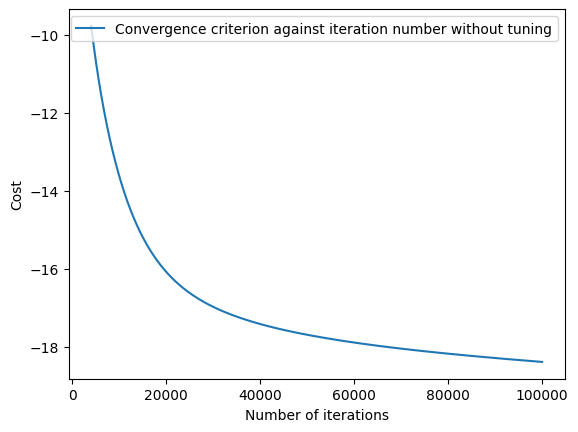

In [58]:
x_opt1, err1 = gradient_descent(f = lambda x: cost(A, x, b),
                      nabla_f = lambda x: grad(A, x, b),
                      x_0 = start, gamma_k = 1/np.linalg.norm(A), # Theorem 22 0 < gamma <= 1/L
                      K = 100_000, eps = 1e-5, tune_step = False)


print('Gradient at x_opt without tuning is\n', grad(A, x_opt1, b))
iteration1 = [i+1 for i in range(len(err1))]
plt.plot(iteration1[4_000:], err1[4_000:], label = 'Convergence criterion against iteration number without tuning')
plt.legend()
plt.xlabel('Number of iterations')
plt.ylabel('Cost')
plt.show()

Tune a step of the method, try to make the convergence faster. Add to the previous plot the convergence of the tuned method. Make conclusions and comment on the results. (1 pts)

 10%|█         | 10229/100000 [00:03<00:32, 2729.94it/s]


Gradient at x_opt with tuning is
 [ 1.42366391e-06  2.60860947e-06 -3.10503469e-06 -1.46671030e-06
  9.21949770e-07 -4.59908702e-06 -2.35645621e-06  3.84410818e-07
  4.21345152e-08 -3.52349658e-07  9.11809293e-07 -8.19093238e-09
  3.84611267e-08 -3.60031109e-06 -1.52635939e-06  2.39138007e-07
 -5.38664850e-06 -1.91978319e-06  2.43398526e-06 -6.19347369e-06
  4.29750315e-08 -3.26279973e-06  4.26368871e-06  2.78855664e-07
  2.08260016e-06 -1.22040824e-07  1.91548792e-06 -7.10907006e-07
 -4.15473686e-06  1.14422545e-06 -4.85129259e-07  2.85325824e-07
  1.59160021e-07 -2.08678755e-06  4.85851094e-06 -3.12266160e-06
 -5.44414707e-06 -2.64622215e-06  1.71720563e-06  2.73489236e-06
 -8.38727001e-06 -2.89425609e-06  8.77908166e-08 -1.33283992e-06
 -1.05615766e-07  3.08905071e-06  1.40398386e-06 -3.60192548e-07
 -2.18172243e-06 -3.30041454e-06  3.57955136e-07 -9.91165003e-07
  9.63370370e-08  9.90115119e-07  3.32121271e-06  2.65475772e-06
  8.57939495e-07 -6.90786346e-07  1.66699448e-06 -6.5000

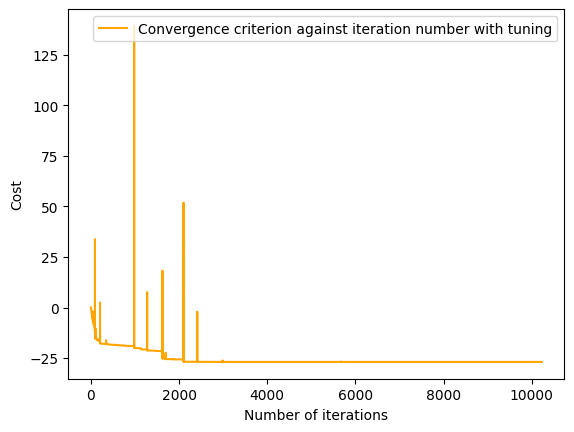

In [59]:
#your code

x_opt, err = gradient_descent(f = lambda x: cost(A, x, b),
                      nabla_f = lambda x: grad(A, x, b),
                      x_0 = start, gamma_k = 1/np.linalg.norm(A), # Theorem 22 0 < gamma <= 1/L
                      K = 100_000, eps = 1e-5, tune_step=True)

print('Gradient at x_opt with tuning is\n', grad(A, x_opt, b))
iteration = [i+1 for i in range(len(err))]
# Adjust the terms plotted for proper visualisation
plt.plot(iteration, err, color = 'orange', label = 'Convergence criterion against iteration number with tuning')
plt.legend()
plt.xlabel('Number of iterations')
plt.ylabel('Cost')
plt.show()

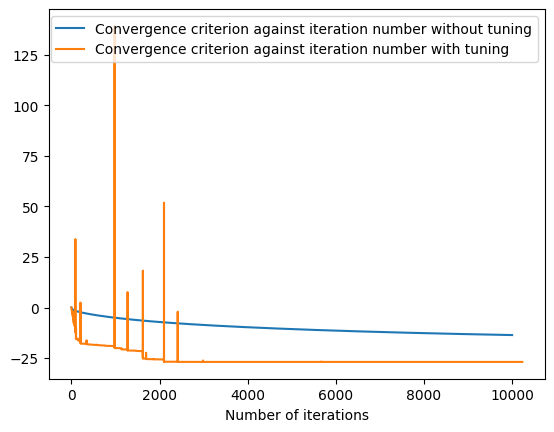

In [63]:
# Both plots together

plt.plot(iteration1[:10_000], err1[:10_000], label = 'Convergence criterion against iteration number without tuning')
plt.legend()

plt.plot(iteration, err, label = 'Convergence criterion against iteration number with tuning')
plt.legend()
plt.xlabel('Number of iterations')
plt.show()



I generated my matrix randomly.

I used the [Barzilai-Borwein method](https://en.wikipedia.org/wiki/Barzilai-Borwein_method) for tuning my gamma parameter (learning rate):
$$\gamma_n = \frac{|(\mathbf{x}_n - \mathbf{x}_{n-1})^T[\nabla F(\mathbf{x}_n)-\nabla F(\mathbf{x}_{n-1})]|}{\| \nabla F(\mathbf{x}_n)-\nabla F(\mathbf{x}_{n-1})\|^2}$$

I noticed the convergence was very fast and more stable as compared to using a constant learning rate (In cases where the learning rate was chosen at random). This was quite unstable and usually required really small values for gamma. I applied theorem 22 from lectures to make sure there was convergence for the case without tuning.

In the example I did above, we can see that the convergence with tuning happened after about $10^4$ iterations, while the other was still converging even after $10^5$ iterations.

### 1.2 (5 pts)
Your task is to implement a linear regression model using the gradient descent optimizer. We'll use the California Housing dataset from sklearn.

In [64]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import  mean_squared_error

# Load the dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target

#Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Formulate the loss function for the model (0.5 pts):


$$
L = \dots
$$

**Solution**

We have that a linear regression model,

$$y_i = x^T_i\mathbf{w} \Rightarrow \mathbf{y} = X\mathbf{w}$$

We can use half the mean squared error for the loss function,

$$
L = \frac{1}{2m}\sum _{i=1}^{m}(y_i - y)^2 =\frac{1}{2n}\| \mathbf{y}_{pred}-\mathbf{y}\|^2 = \frac{1}{2m}\|X\mathbf{w}-\mathbf{y}\|^2\\
L =\frac{1}{2m}\left(\mathbf{w}^TX^TX\mathbf{w}-2\mathbf{y}^TX\mathbf{w}+\mathbf{y}^T\mathbf{y} \right)\\
$$

Hence, we can calculate the gradient of $L$

$$
\nabla L = \frac{1}{m}\left(X^TX\mathbf{w} - X^T\mathbf{y} \right)
$$

Implement a function for a linear regression model using gradient descent optimization, based on your implementation problem 1.1. (1 pts)

In [65]:
def linear_regression(X, y, learning_rate=0.01, num_iterations=1000):
    """
    Parametrs:
    X: numpy array of shape (m, n), where m is the number of samples and n is the number of features
    y: numpy array of shape (m,), the target values
    learning_rate: float, the learning rate for gradient descent (1e-2 by defolt)
    num_iterations: int, number of iterations to perform (1000 by defolt)

    Returns:
    weights: numpy array of shape (n,), the learned weights.
    loss: list of floats, the cost function value at each iteration.
    """
    m = len(y)

    L = lambda w: (np.linalg.norm(X @ w -y)**2)/(2*m)
    grad_L = lambda w: (X.T @ X @ w - X.T @ y)/m


    weights, loss = gradient_descent(f = L, nabla_f = grad_L, x_0 = np.zeros(X.shape[1]), gamma_k = learning_rate,
                          K = num_iterations, eps = 1e-5, tune_step = True # False to deactivate tuning
                                     )
    return weights, loss

Train your model using the training dataset, and evaluate its performance on the test set using Mean Squared Error (MSE) metric. Plot the cost function over iterations to examine convergence. (1 pts)


 98%|█████████▊| 983/1000 [00:01<00:00, 616.07it/s]


Model evaluation using MSE: 0.6294438930644496


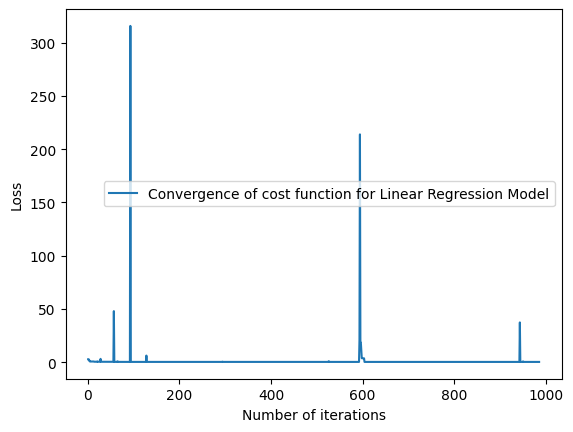

In [74]:
#your code
# With step tuning

weights, loss = linear_regression(X_train, y_train, learning_rate=1/(np.linalg.norm(X_train.T @ X_train)))

y_pred = X_test @ weights

# Performance evaluation
MSE = mean_squared_error(y_test, y_pred)
print(f'Model evaluation using MSE: {MSE}')

iterations = [i+1 for i in range(len(loss))]
plt.plot(iterations, loss, label = 'Convergence of cost function for Linear Regression Model')
plt.legend()
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.show()


Use scikit-learn’s Linear Regression model to fit the same training data. Compare the coefficients learned by your gradient descent implementation with those learned by scikit-learn’s model. Discuss any discrepancies. Compare the final evaluation metric (MSE) of your model against the scikit-learn model. (1 pts)


In [75]:
#your code
from sklearn.linear_model import LinearRegression

sk_regression = LinearRegression()

sk_regression.fit(X_train, y_train)

y_predsk = sk_regression.predict(X_test)

mse = mean_squared_error(y_true = y_test, y_pred = y_predsk)

skcoef = sk_regression.coef_
print(f'The distance between my model\'s weights and scikit-learn weights is {np.linalg.norm(skcoef-weights)}')
print(f'scikit-learn model evaluation using MSE: {mse}\nMy model\'s evaluation using MSE: {MSE}')



The distance between my model's weights and scikit-learn weights is 0.5921693859092494
scikit-learn model evaluation using MSE: 0.5558915986952422
My model's evaluation using MSE: 0.6294438930644496


Discuss how the choice of learning rate and number of iterations impacts the convergence and accuracy of the model.
Analyze the importance of feature scaling in the performance of gradient descent. (1.5 pts)


**Answer**

I noticed that the using the step tuning for the learning rate made my model way more accurate.

Initially, after a certain number of iterations (about 2000), there was not any much improvement in accuracy as measured using the mean squared error metric. But using Theorem 22 from lecture note, I changed the initial learning rate from default value and brought that down to about 1000.

About feature scaling, I realise that when modelling my linear regression, it was done in such a way that assumes the model must pass through the origin ($\mathbf{y} = X\mathbf{w}$). But if the features are scaled, then we can be sure that this assumption holds true.

  5%|▍         | 48/1000 [00:00<00:03, 253.54it/s]


Model evaluation after scaling using MSE: 4.863277416214943


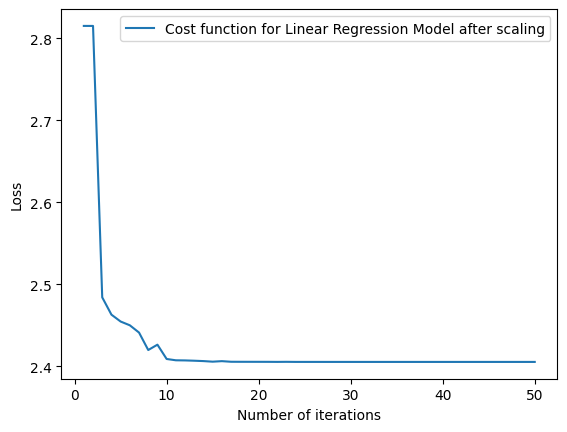

In [77]:
#your answer

# I will scale the features, run the model, and measure metrics again

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

# With step tuning

weights_scaled, loss_scaled = linear_regression(scaled_X_train,
                                  y_train,
                                  learning_rate=1/(np.linalg.norm(scaled_X_train.T @ scaled_X_train)))

scaled_y_pred = scaled_X_test @ weights_scaled

# Performance evaluation
scaled_MSE = mean_squared_error(y_test, scaled_y_pred)
print(f'Model evaluation after scaling using MSE: {scaled_MSE}')

iterations_scaled = [i+1 for i in range(len(loss_scaled))]
plt.plot(iterations_scaled, loss_scaled, label = 'Cost function for Linear Regression Model after scaling')
plt.legend()
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.show()

In [78]:
#your code
from sklearn.linear_model import LinearRegression

sk_regression_scaled = LinearRegression()

sk_regression_scaled.fit(scaled_X_train, y_train)

y_predsk_scaled = sk_regression_scaled.predict(scaled_X_test)

scaled_mse = mean_squared_error(y_true = y_test, y_pred = y_predsk_scaled)

skcoef_scaled = sk_regression.coef_
print(f'The distance between my model\'s weights and scikit-learn weights is {np.linalg.norm(skcoef_scaled-weights_scaled)}')
print(f'scikit-learn model evaluation using MSE: {scaled_mse}\nMy model\'s evaluation using MSE: {scaled_MSE}')

The distance between my model's weights and scikit-learn weights is 0.9070310867598597
scikit-learn model evaluation using MSE: 0.5558915986952442
My model's evaluation using MSE: 4.863277416214943


After scaling, I reduced the number of iterations greatly, but error increased.

# Problem 2

Consider Lemma 12 from the lecture notes: Let $f$ be a differentiable, $L$-smooth function. Then
$$f(x) \leq \underbrace{f(y) + \langle \nabla f(y), x-y \rangle + \frac{L}{2}\|x-y \|^2}_{g(x):=}$$
for all $x, y \in \mathbb{R}^d$. Find the optimal $x$ that minimizes the upper bound $g(x)$.

**Solution**

\begin{align*}
g(x) &= f(y) + \langle \nabla f(y), x-y \rangle + \frac{L}{2}\|x-y \|^2\\
&= \langle \nabla f(y), x\rangle + \frac{L}{2}\|x \|^2 - L\langle x, y \rangle + f(y) - \langle \nabla f(y), y\rangle + \frac{L}{2}\|y \|^2\\
&= \langle \nabla f(y), x\rangle + \frac{L}{2}\langle x, x \rangle - L\langle x, y \rangle + f(y) - \langle \nabla f(y), y\rangle + \frac{L}{2}\|y \|^2\\
\Rightarrow g(x) & \textbf{ is quadratic. This implies the function is convex}\\
\Rightarrow dg &= \langle \nabla f(y), dx\rangle + \frac{L}{2}\langle (I_n + I_n^T)x, dx \rangle - L\langle y, dx \rangle\\
&= \langle \nabla f(y), dx\rangle + \frac{L}{2}\langle 2x, dx \rangle - L\langle y, dx \rangle\\
&= \langle \nabla f(y), dx\rangle + L\langle x, dx \rangle - L\langle y, dx \rangle\\
&= \langle \nabla f(y), dx\rangle + L\langle x-y, dx \rangle\\
dg &= \langle \nabla f(y) + L(x-y), dx\rangle\\
\Rightarrow \nabla g(x) &= \nabla f(y) + L(x-y)\\
\Rightarrow x^* &= \frac{yL - \nabla f(y)}{L}\\
\end{align*}

Hence, the optimal value of $x$ that minimizes the upper bound of $g(x)$ is $\frac{yL - \nabla f(y)}{L}$

For convexity,

\begin{align*}
    d^2g &= d(\langle \nabla f(y) + L(x-y), dx_1\rangle) = \langle d(\nabla f(y) + L(x-y)), dx_1\rangle\\
    &= \langle LI_ndx, dx_1\rangle\\
    \Rightarrow \nabla ^2 g &= LI_n \succ 0\\
\end{align*}

Optimal value,
$$x^* = \frac{yL - \nabla f(y)}{L}$$

# 3

Consider Theorem 22 and the corresponding proof from the lecture notes. How would the result change
if, instead of $L$–smoothness (implies Lemma 12), the function f satisfies the inequality

$$f(x) \leq f(y) + \langle \nabla f(y), x-y\rangle + \frac{L}{2}\|x-y\|^2 + \delta$$

for all $x, y \in \mathbb{R}^d$ and some $\delta \geq 0$? (Theorem 22 is true when $\delta = 0$. What if $\delta > 0$?)


**Solution**

From the given inequality and GD update rule $x^{k+1} = x^k - \gamma \nabla f(x^k)$, we have

$$f(x^{k+1}) \leq f(x^k) + \langle \nabla f(x^k), x^{k+1}-x^k\rangle + \frac{L}{2}\|x^{k+1}-x^k\|^2 + \delta\\
\Rightarrow f(x^{k+1}) \leq f(x^k) - \gamma \|\nabla f(x^k)\|^2 + \frac{L\gamma^2}{2}\|\nabla f(x^k)\|^2 + \delta\\
\Rightarrow f(x^{k+1}) \leq f(x^k) - (\gamma - \frac{L\gamma^2}{2})\|\nabla f(x^k)\|^2 + \delta$$

For $0<\gamma \leq \frac{1}{L}$, we have that $\gamma - \frac{L\gamma^2}{2} \leq \frac{\gamma}{2}$, hence,


$$f(x^{k+1}) \leq f(x^k) - (\gamma - \frac{L\gamma^2}{2})\|\nabla f(x^k)\|^2 + \delta \leq f(x^k) - \frac{\gamma}{2}\|\nabla f(x^k)\|^2 + \delta$$

Summing the inequality over $k = 0, 1, \dots, T-1$, we get,

$$f(x^T) \leq f(x^0) - \frac{\gamma}{2}\sum_{k=0}^{T-1} \|\nabla f(x^k)\|^2 + T\delta$$. Let $f^*$ denote the lower bound of $f$. Then,

$$f^*\leq f(x^T) \leq f(x^0) - \frac{\gamma}{2}\sum_{k=0}^{T-1} \|\nabla f(x^k)\|^2 + T\delta$$

This gives,

$$f^*\leq f(x^0) - \frac{\gamma}{2}\sum_{k=0}^{T-1} \|\nabla f(x^k)\|^2 + T\delta\\
\Rightarrow \frac{\gamma}{2}\sum_{k=0}^{T-1} \|\nabla f(x^k)\|^2 \leq f(x^0)-f^*+T\delta \\
\Rightarrow \frac{1}{T}\sum_{k=0}^{T-1} \|\nabla f(x^k)\|^2 \leq \frac{2(f(x^0)-f^*)}{\gamma T} + \frac{2\delta}{\gamma}$$